# MSc in AI - CE6002 & CS5062


# E-tivity 5: Higher Dimensions

# CE6002 - Tasks 4 and 5

## Student Name: Mark Murnane
## Student ID: 18195326
-----

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Sample code to plot SVM margin, 'gutters' and support vectors

MM: Converted to a function

In [38]:
plt.rcParams["figure.figsize"] = (16,9)

def plot_svm_margins(features, target, classifier):

    plt.scatter(features[:, 0], features[:, 1], c=target, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    # Title
    plt.title(f"SVM with C={classifier.C}")


# Task 4

------

### Import Dataset 1

The datafile *dataset_1.csv* contains the data for Task 4 containint 10,001 samples.  The first line of the file appears to be aheader.  The first column of the file appears to be a simple row reference (zero-based).  Both of these elements can omitted from the file.

Each row of the file then contains two attributes (floating point numbers) and a target which is either 1 or 0.  

To keep the number of imports low we can use Numpy routines to import the data, such as `genfromtxt`.

In [19]:
# Read the data and drop the header and the first column
all_data = np.genfromtxt('./dataset_1.csv', delimiter=',', skip_header=1, usecols=(1, 2, 3))

# Split the data into the features and target
X = all_data[:,:-1]
y = all_data[:,-1]

Before doing anything else separate the data set into a Training and Test set. Given the large data set it's safe to take the usual 20% of data for test.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Baseline

As a baseline an SVM classifier with _linear_ kernel with default options is used.

In [44]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Training score of SVC with all defaults: 1.0
Test score of SVC with all defaults: 1.0


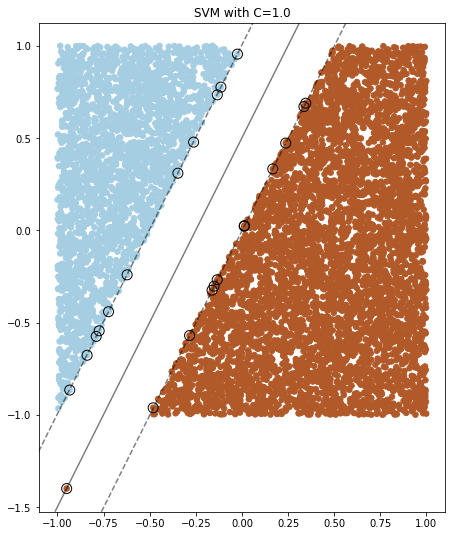

In [49]:
print(f"Training score of SVC with all defaults: {clf.score(X_test, y_test)}")
print(f"Test score of SVC with all defaults: {clf.score(X_test, y_test)}")
plot_svm_margins(X_train, y_train, clf)

### Hard and Soft margin C values

In general, high values of C represent hard margins, and low values of C represent soft margins.  A soft margin may even allow misclassification in a completely separable data set.

Here we'll try C=10,000 for a hard margin and C=0.001 for a soft margin

Training score of SVC with Soft Margin C: 1.0
Test score of SVC with Soft Margin C: 1.0


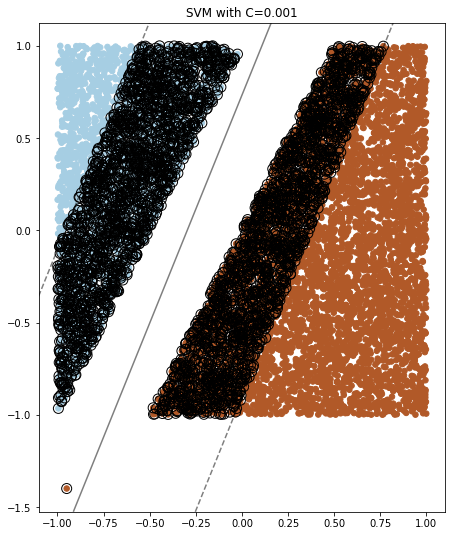

In [54]:
soft_clf = svm.SVC(C=0.001, kernel='linear')
soft_clf.fit(X_train, y_train)
print(f"Training score of SVC with Soft Margin C: {soft_clf.score(X_test, y_test)}")
print(f"Test score of SVC with Soft Margin C: {soft_clf.score(X_test, y_test)}")
plot_svm_margins(X_train, y_train, soft_clf)

Scoring of SVC with Hard Margin C: 1.0
Test score of SVC with Hard Margin C: 1.0


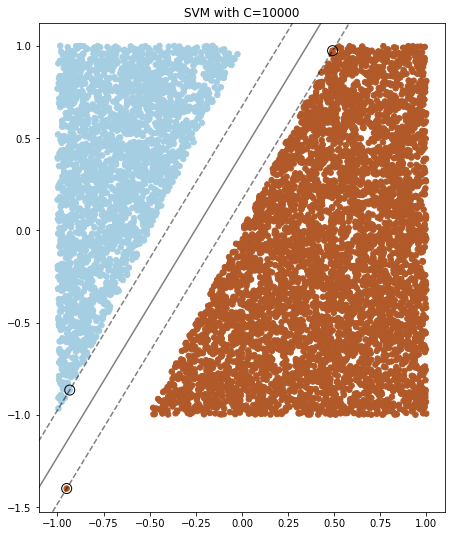

In [52]:
hard_clf = svm.SVC(C=10000, kernel='linear')
hard_clf.fit(X_train, y_train)
print(f"Scoring of SVC with Hard Margin C: {hard_clf.score(X_test, y_test)}")
print(f"Test score of SVC with Hard Margin C: {hard_clf.score(X_test, y_test)}")
plot_svm_margins(X_train, y_train, hard_clf)

### Conclusion

All models successfully separate the data in the test set. The baseline implementation, as expected separates the data at exactly the midpoint between the two classes, even though there is a single outlier right on this line.

The classifier with a soft margin draws a different separating line, resulting in the misclassification of this outlier.  It has quite a wide margin allowing for some misclassification to occur while maintaining confidence in the algorithm.  In this contrived example the very low value of C means that soft margin covers quite a bit of the different classes.

The classifier with the hard margin correctly classifies all results, but has a relatively narrow margin for this.  It has fewer support vectors, and the line of separation visually appears to sub-optimal.